In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import matplotlib for future plot customization "rcparams"
import matplotlib
import seaborn as sns

# make sure to save your plots using:
%matplotlib inline

In [29]:
unicorn_df = pd.read_csv('/content/Unicorn_Companies.xls')

In [30]:
unicorn_df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,$1,2/22/2022,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015.0,$181.06M,NaN,7.0,2.0,NaN
1033,Scalapay,$1,2/23/2022,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019.0,$700M,NaN,10.0,2.0,NaN
1034,Omada Health,$1,2/23/2022,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011.0,$449.72M,NaN,30.0,6.0,NaN
1035,BlueVoyant,$1,2/23/2022,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017.0,$525.5M,NaN,6.0,2.0,NaN


In [31]:
unicorn_df.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Inverstors', 'Founded Year', 'Total Raised',
       'Financial Stage', 'Investors Count', 'Deal Terms', 'Portfolio Exits'],
      dtype='object')

In [32]:
unicorn_df['Date Joined'] = pd.to_datetime(unicorn_df['Date Joined'])
# a good trick is to add format parameter, since the date column sometimes is written the american way: mm/dd/yyyy, you can run help(pd.to_datetime)
"""
    format : str, default None
        The strftime to parse time, e.g. :const:`"%d/%m/%Y"`. See

"""

'\n    format : str, default None\n        The strftime to parse time, e.g. :const:`"%d/%m/%Y"`. See\n\n'

In [9]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool' = False, format: 'str | None' = None, exact: 'bool | lib.NoDefault' = <no_default>, unit: 'str | None' = None, infer_datetime_format: 'lib.NoDefault | bool' = <no_default>, origin: 'str' = 'unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
    Convert argument to datetime.
    
    This function converts a scalar, array-like, :class:`Series` or
    :class:`DataFrame`/dict-like to a pandas datetime object.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime. If a :class:`DataFrame` is provided, the
        method expects minimally the following columns: :const:`"year"`,
        :const:`"mon

In [33]:
# whenever you make a data conversion try to check it
unicorn_df['Date Joined']

,Date Joined
0,2017-04-07
1,2012-12-01
2,2014-01-23
3,2011-12-12
4,2018-10-26
...,...
1032,2022-02-22
1033,2022-02-23
1034,2022-02-23
1035,2022-02-23


In [34]:
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   object        
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1020 non-null   object        
 7   Founded Year       994 non-null    float64       
 8   Total Raised       1013 non-null   object        
 9   Financial Stage    49 non-null     object        
 10  Investors Count    1036 non-null   float64       
 11  Deal Terms         1008 non-null   float64       
 12  Portfolio Exits    49 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 105.4

# Doing it this way, will be a fat mistake

In [22]:
# !!!!! DONT DO IT THIS WAY
# check the other columns' dtypes, for example: Total Raised, Valuation ($B) should be numeric
unicorn_df['Valuation ($B)'] = pd.to_numeric(unicorn_df['Valuation ($B)'], errors='coerce')
unicorn_df['Total Raised'] = pd.to_numeric(unicorn_df['Total Raised'], errors='coerce')

# For the Valuation ($B) column

In [35]:
unicorn_df['Valuation ($B)']

,Valuation ($B)
0,$140
1,$100.3
2,$95
3,$45.6
4,$42
...,...
1032,$1
1033,$1
1034,$1
1035,$1


In [39]:
# create a lambda function to convert the dtype
dollarizer = lambda x: float(x[1:])
unicorn_df['Valuation ($B)'] = unicorn_df['Valuation ($B)'].apply(dollarizer)

In [ ]:
# you did it this, you choose what you want:
unicorn_df['Valuation ($B)'] = unicorn_df['Valuation ($B)'].str.replace('$', '').astype(float)

In [40]:
# check the change now
unicorn_df['Valuation ($B)'].head(3) # as you can see we did a great job converting the dtype to float64

,Valuation ($B)
0,140.0
1,100.3
2,95.0


# For Total Raised column

In [46]:
unicorn_df["Total Raised"]

,Total Raised
0,$7.44B
1,$6.874B
2,$2.901B
3,$3.472B
4,$4.377B
...,...
1032,$181.06M
1033,$700M
1034,$449.72M
1035,$525.5M


So here's my logic for this:
- We can't apply the dollarizer directly, since the total raised has different characters at the end (B, M, ...)
- First try to check what are those different characters
- Then create a function and apply it on the whole column

In [50]:
# to check what are those different characters

unicorn_df['Total Raised'].str.strip().str[-1].value_counts()

,count
Total Raised,
M,894
B,115
K,4


In [51]:
# we should get the number out and then multiply by 1B if the last index is B and 1M if M ...
def convert_to_numeric(value):
    if isinstance(value, str):  # Check if the value is a string
        if value[-1] == 'B':  # If it ends with 'B'
            return np.around(float(value[1:-1]) * 1_000_000_000, 2)  # Convert to billions
        elif value[-1] == 'M':  # If it ends with 'M'
            return np.around(float(value[1:-1]) * 1_000_000, 2)  # Convert to millions
        elif value[-1] == 'K':  # If it ends with 'K'
            return np.around(float(value[1:-1]) * 1_000, 2)  # Convert to thousands
    return np.nan  # Return NaN for non-string values or unexpected formats

unicorn_df["Total Raised"] = unicorn_df["Total Raised"].apply(convert_to_numeric)

In [56]:
# Check the changes
unicorn_df["Total Raised"].head(4)

,Total Raised
0,7.440000e+09
1,6.874000e+09
2,2.901000e+09
3,3.472000e+09


In [52]:
# Now let's handle missing values
unicorn_df.isna().sum()

,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,0
Industry,0
Select Inverstors,17
Founded Year,43
Total Raised,24
Financial Stage,988


In [53]:
# as you can see there are a lot of missing values, try to replace nan with the mean, median or simply drop them if you have a lots of columns

# Identify numeric, object cols
numeric_cols = unicorn_df.select_dtypes(include=['number']).columns
object_cols = unicorn_df.select_dtypes(include=['object']).columns

In [54]:
print(numeric_cols, object_cols)

Index(['Valuation ($B)', 'Founded Year', 'Total Raised', 'Investors Count',
       'Deal Terms', 'Portfolio Exits'],
      dtype='object') Index(['Company', 'Country', 'City', 'Industry', 'Select Inverstors',
       'Financial Stage'],
      dtype='object')


For the financial Stage for now we'll just replace it with the mode, but if we're working on a production model we better find a logic to replace the missing values (Google: Advanced KNN missing value imputation)

In [57]:
# Replace NaN with mean for numeric columns
for col in numeric_cols:
  unicorn_df[col].fillna(unicorn_df[col].mean(), inplace=True)

# Replace NaN with mode for categorical columns
for col in object_cols:
    unicorn_df[col].fillna(unicorn_df[col].mode()[0], inplace=True)

# Check for missing values after replacement
unicorn_df.isna().sum()

<ipython-input-57-78e9a1c9def7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unicorn_df[col].fillna(unicorn_df[col].mean(), inplace=True)
<ipython-input-57-78e9a1c9def7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,0
Industry,0
Select Inverstors,0
Founded Year,0
Total Raised,0
Financial Stage,0


# Before Starting EDA, check if your data is ready

In [58]:
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   float64       
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1037 non-null   object        
 7   Founded Year       1037 non-null   float64       
 8   Total Raised       1037 non-null   float64       
 9   Financial Stage    1037 non-null   object        
 10  Investors Count    1037 non-null   float64       
 11  Deal Terms         1037 non-null   float64       
 12  Portfolio Exits    1037 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 105.4

# Exploratory Data Analysis

Try to add text here explaining what you're doing, for example:
### Number of Companies by Country

In [60]:
# you can get the result as a dataframe using reset_dex
# your code: unicorn_df.groupby('Country')['Company'].count().sort_values(ascending = False)

unicorn_df.groupby('Country')['Company'].count().sort_values(ascending = False).reset_index().head(5)

,Country,Company
0,United States,536
1,China,168
2,India,63
3,United Kingdom,42
4,Germany,24


#### Why not plotting the top 10 countries for example?

Text(0, 0.5, 'Countries')

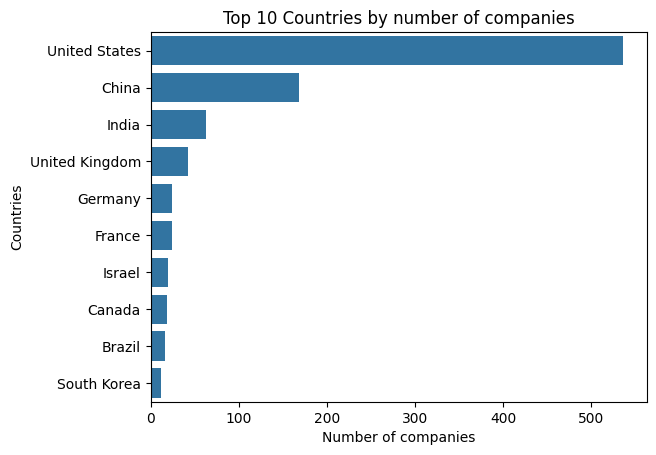

In [63]:
top_10_countries_by_number_of_companies=  unicorn_df.groupby('Country')['Company'].count().sort_values(ascending = False).reset_index().head(10)

sns.barplot(data=top_10_countries_by_number_of_companies, x="Company", y="Country")
plt.title("Top 10 Countries by number of companies")
plt.xlabel("Number of companies")
plt.ylabel("Countries")

Same here, add some context
### Number of companies in each industry globally
- You can add another plot, grouping by the country and try to look for the popular industries in each country from those in top 10

Text(0, 0.5, 'Industries')

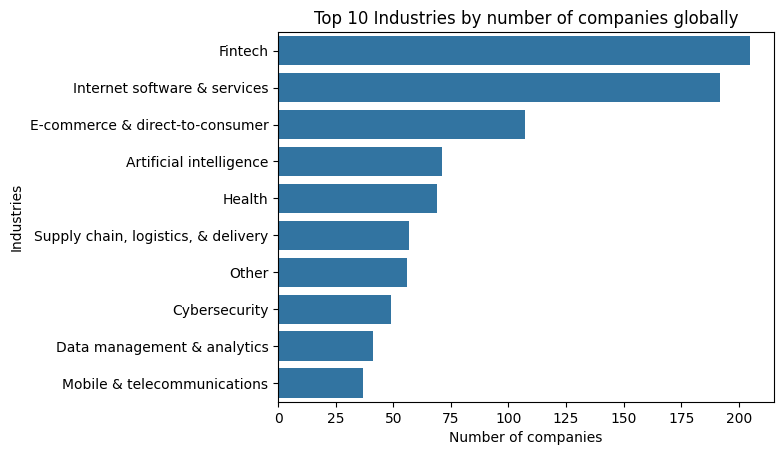

In [65]:
top_10_industries_by_number_of_companies_globally =  unicorn_df.groupby('Industry')['Company'].count().sort_values(ascending = False).reset_index().head(10)

sns.barplot(data=top_10_industries_by_number_of_companies_globally, x="Company", y="Industry")
plt.title("Top 10 Industries by number of companies globally")
plt.xlabel("Number of companies")
plt.ylabel("Industries")

# Don't change the pattern in which the values are written in

In [69]:
unicorn_df['Industry'] = unicorn_df['Industry'].replace('Artificial Intelligence', 'Artificial intelligence')

In [70]:
unicorn_df['Year Joined'] = unicorn_df['Date Joined'].dt.year

In [72]:
unicorn_df.groupby('Year Joined')['Company'].count().reset_index()

,Year Joined,Company
0,2007,1
1,2011,2
2,2012,4
3,2013,3
4,2014,13
5,2015,35
6,2016,21
7,2017,44
8,2018,103
9,2019,107


In [73]:
# df1 = pd.DataFrame(unicorn_df.groupby('Year Joined')['Company'].count())
# do it this way:
df1 = unicorn_df.groupby('Year Joined')['Company'].count().reset_index()

df1.head()

,Year Joined,Company
0,2007,1
1,2011,2
2,2012,4
3,2013,3
4,2014,13


Text(0, 0.5, 'number of companies')

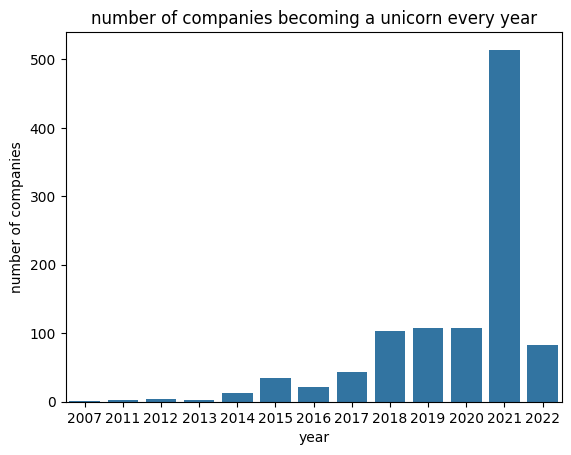

In [97]:
sns.barplot(x='Year Joined', y='Company', data = df1)

plt.title('number of companies becoming a unicorn every year')
plt.xlabel('year')
plt.ylabel('number of companies')

In [75]:
health_df = unicorn_df[unicorn_df['Industry']== 'Health']

In [76]:
df3 = pd.DataFrame(health_df.groupby('Year Joined')['Company'].count())

df3

,Company
Year Joined,
2014,1
2015,2
2016,1
2017,4
2018,6
2019,4
2020,9
2021,37
2022,5


Text(0, 0.5, 'number of companies')

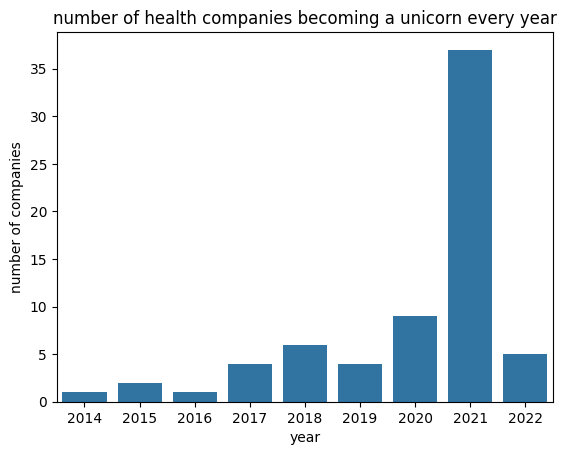

In [77]:
sns.barplot(x='Year Joined', y='Company', data = df3)

plt.title('number of health companies becoming a unicorn every year')
plt.xlabel('year')
plt.ylabel('number of companies')

Try to understand why the peak was 2021, and why the significant drop in 2022

In [78]:
other_df = unicorn_df[unicorn_df['Industry']!= 'Health']

In [79]:
other_df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,7.440000e+09,IPO,28.0,8.0,5.000000,2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,6.874000e+09,Acquired,29.0,12.0,1.346939,2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,2.901000e+09,Asset,39.0,12.0,1.000000,2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,3.472000e+09,Acquired,56.0,13.0,1.000000,2011
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,4.377000e+09,Acquired,25.0,5.0,2.000000,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,Hasura,1.0,2022-02-22,India,Bengaluru,Internet software & services,"Nexus Venture Partners, Vertex Ventures, STRIVE",2017.0,1.365100e+08,Acquired,11.0,1.0,1.346939,2022
1032,Timescale,1.0,2022-02-22,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015.0,1.810600e+08,Acquired,7.0,2.0,1.346939,2022
1033,Scalapay,1.0,2022-02-23,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019.0,7.000000e+08,Acquired,10.0,2.0,1.346939,2022
1035,BlueVoyant,1.0,2022-02-23,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017.0,5.255000e+08,Acquired,6.0,2.0,1.346939,2022


In [80]:
df2 = pd.DataFrame(other_df.groupby('Year Joined')['Company'].count())

df2

,Company
Year Joined,
2007,1
2011,2
2012,4
2013,3
2014,12
2015,33
2016,20
2017,40
2018,97


Text(0, 0.5, 'number of companies')

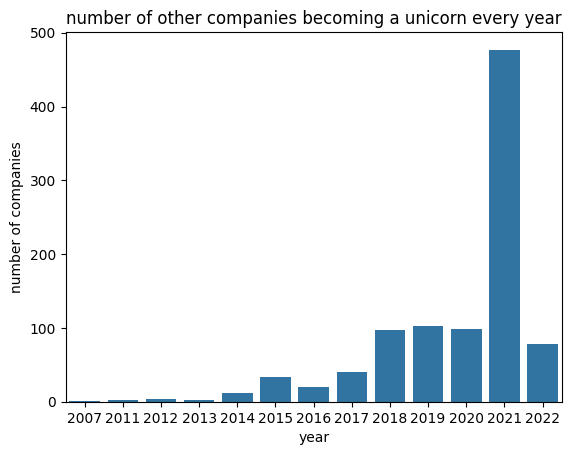

In [81]:
sns.barplot(x='Year Joined', y='Company', data = df2)

plt.title('number of other companies becoming a unicorn every year')
plt.xlabel('year')
plt.ylabel('number of companies')

In [ ]:
def most_valuable_unicorn(industry):
    df = unicorn_df[unicorn_df['Industry']==industry][['Company', 'Valuation ($B)']]
    maxi = max(df['Valuation ($B)'])
    res = df[df['Valuation ($B)']==maxi]['Company']
    return res.tolist()[0]


most_valuable_unicorn('Artificial intelligence')

'Bytedance'

In [88]:
# You can do it using idxmax:

def most_valuable_unicorn(industry):
    # Filter the DataFrame for the specified industry and select relevant columns
    df = unicorn_df[unicorn_df['Industry'] == industry][['Company', 'Valuation ($B)']]

    # Use idxmax to find the index of the maximum valuation
    max_index = df['Valuation ($B)'].idxmax()

    # Retrieve the company name at that index
    most_valuable_company = df.at[max_index, 'Company']

    return most_valuable_company

most_valuable_unicorn('Artificial intelligence')

'Bytedance'

Rename this function: country_with_most_unicorns to something that follows your logic, for example you're looking for the country with the most unicorns in a particular industry

In [89]:
def country_with_most_unicorns(industry):
    df = unicorn_df[unicorn_df['Industry']==industry][['Company','Country']]
    df = df.groupby('Country').count().reset_index()
    maxi = max(df['Company'])
    res = df[df['Company']==maxi]['Country']
    return res.tolist()[0]

country_with_most_unicorns('Artificial intelligence')

'United States'

In [92]:
# you can do it using idmax:

def country_with_most_unicorns_by_industry(industry):
    df = unicorn_df[unicorn_df['Industry']==industry][['Company','Country']]
    df = df.groupby('Country').count().reset_index()
    max_index = df['Company'].idxmax()
    top_country = df.at[max_index, 'Country']
    return top_country

country_with_most_unicorns_by_industry('Artificial intelligence')

'United States'

In [ ]:
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   object        
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1020 non-null   object        
 7   Founded Year       994 non-null    float64       
 8   Total Raised       1013 non-null   object        
 9   Financial Stage    49 non-null     object        
 10  Investors Count    1036 non-null   float64       
 11  Deal Terms         1008 non-null   float64       
 12  Portfolio Exits    49 non-null     float64       
 13  Year Joined        1037 non-null   int32         
dtypes: datet

Explain what you are doing

In [93]:
results_df = unicorn_df.groupby('Industry').agg({
    'Company': 'count',
    'Valuation ($B)': ['mean', 'max'],
    'Investors Count': 'sum'
})
# results_df.rename(columns={
#     'Company': 'Number of unicorns',
#     'Valuation ($B)': {'mean': 'Average valuation of a unicorn',
#                        'max': 'Maximum valuation'},
#     'Investors Count': 'The number of investors'
# })

results_df.columns = results_df.columns.to_flat_index()
results_df = results_df.rename(columns={
    ('Company', 'count') : 'Number of unicorns',
    ('Valuation ($B)', 'mean'): 'Average valuation of a unicorn ($B)',
    ('Valuation ($B)', 'max'): 'Maximum valuation ($B)',
    ('Investors Count', 'sum') : 'The number of investors'
})

results_df = results_df.reset_index()


results_df


,Industry,Number of unicorns,Average valuation of a unicorn ($B),Maximum valuation ($B),The number of investors
0,"500 Global, Rakuten Ventures, Golden Gate Vent...",1,1.100000,1.10,16.000000
1,"Andreessen Horowitz, DST Global, IDG Capital",1,1.000000,1.00,8.000000
2,Artificial intelligence,78,4.075513,140.00,1206.000000
3,Auto & transportation,29,3.334483,11.40,435.432432
4,"B Capital Group, Monk's Hill Ventures, Dynamic...",1,1.000000,1.00,15.000000
5,Consumer & retail,25,3.005200,15.00,300.000000
6,Cybersecurity,49,2.504082,9.00,640.000000
7,Data management & analytics,41,3.313171,38.00,477.000000
8,"Dragonfly Captial, Qiming Venture Partners, DS...",1,1.050000,1.05,22.000000
9,E-commerce & direct-to-consumer,107,3.041028,27.00,1579.000000


In [94]:
results_df['Most Valuable unicorn'] = [most_valuable_unicorn(industry) for industry in results_df['Industry']]
results_df['The country with most unicorns'] = [country_with_most_unicorns_by_industry(industry) for industry in results_df['Industry']]


results_df

,Industry,Number of unicorns,Average valuation of a unicorn ($B),Maximum valuation ($B),The number of investors,Most Valuable unicorn,The country with most unicorns
0,"500 Global, Rakuten Ventures, Golden Gate Vent...",1,1.100000,1.10,16.000000,Carousell,Singapore
1,"Andreessen Horowitz, DST Global, IDG Capital",1,1.000000,1.00,8.000000,Cider,Hong Kong
2,Artificial intelligence,78,4.075513,140.00,1206.000000,Bytedance,United States
3,Auto & transportation,29,3.334483,11.40,435.432432,ZongMu Technology,China
4,"B Capital Group, Monk's Hill Ventures, Dynamic...",1,1.000000,1.00,15.000000,Ninja Van,Singapore
5,Consumer & retail,25,3.005200,15.00,300.000000,Yuanqi Senlin,United States
6,Cybersecurity,49,2.504082,9.00,640.000000,Tanium,United States
7,Data management & analytics,41,3.313171,38.00,477.000000,Databricks,United States
8,"Dragonfly Captial, Qiming Venture Partners, DS...",1,1.050000,1.05,22.000000,Matrixport,Singapore
9,E-commerce & direct-to-consumer,107,3.041028,27.00,1579.000000,Fanatics,United States


Export your file at the end

In [96]:
results_df.to_csv("insights.csv", index=False)

Group the graphs together

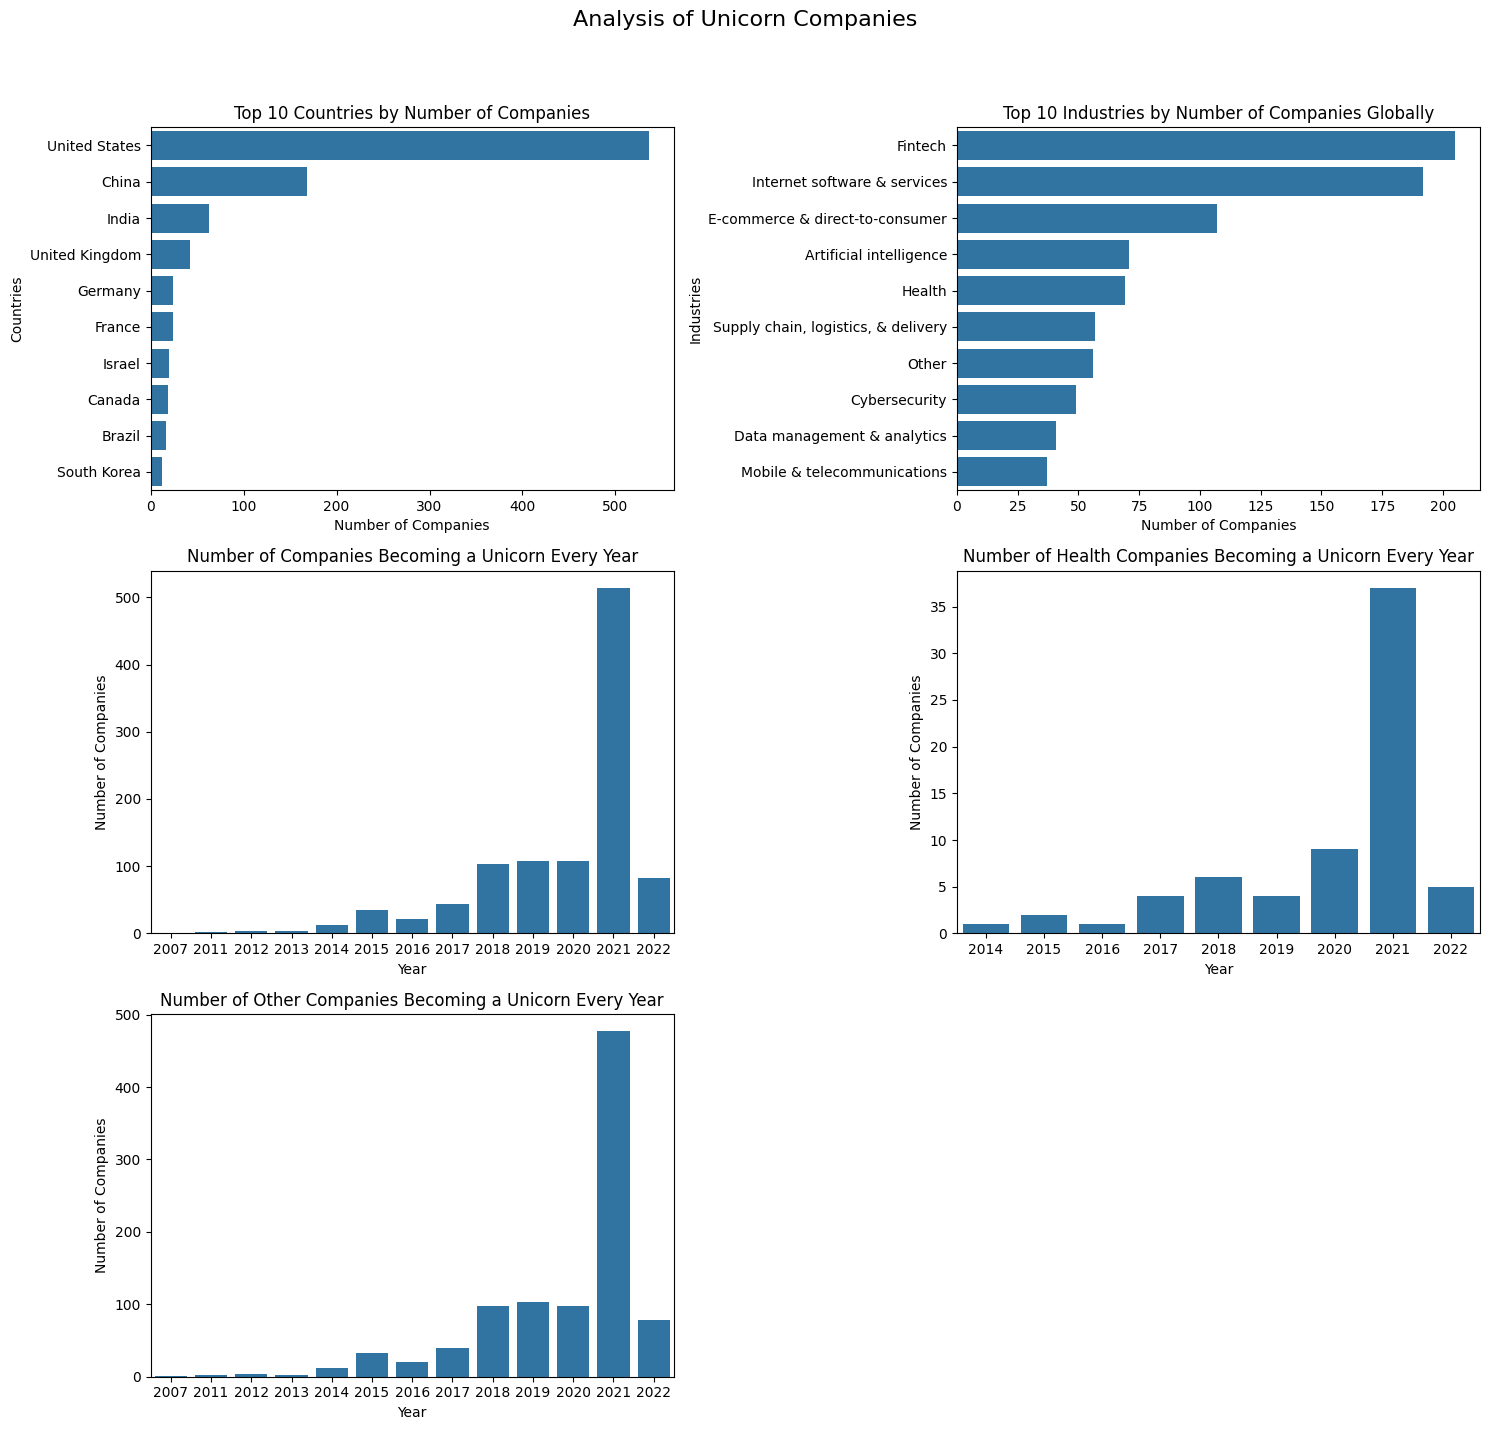

In [98]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle("Analysis of Unicorn Companies", fontsize=16)

# Plot 1: Top 10 Countries by Number of Companies
sns.barplot(data=top_10_countries_by_number_of_companies, x="Company", y="Country", ax=axes[0, 0])
axes[0, 0].set_title("Top 10 Countries by Number of Companies")
axes[0, 0].set_xlabel("Number of Companies")
axes[0, 0].set_ylabel("Countries")

# Plot 2: Top 10 Industries by Number of Companies Globally
sns.barplot(data=top_10_industries_by_number_of_companies_globally, x="Company", y="Industry", ax=axes[0, 1])
axes[0, 1].set_title("Top 10 Industries by Number of Companies Globally")
axes[0, 1].set_xlabel("Number of Companies")
axes[0, 1].set_ylabel("Industries")

# Plot 3: Number of Companies Becoming a Unicorn Every Year
sns.barplot(x='Year Joined', y='Company', data=df1, ax=axes[1, 0])
axes[1, 0].set_title('Number of Companies Becoming a Unicorn Every Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Companies')

# Plot 4: Number of Health Companies Becoming a Unicorn Every Year
sns.barplot(x='Year Joined', y='Company', data=df3, ax=axes[1, 1])
axes[1, 1].set_title('Number of Health Companies Becoming a Unicorn Every Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Companies')

# Plot 5: Number of Other Companies Becoming a Unicorn Every Year
sns.barplot(x='Year Joined', y='Company', data=df2, ax=axes[2, 0])
axes[2, 0].set_title('Number of Other Companies Becoming a Unicorn Every Year')
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Number of Companies')

# Hide the empty subplot (if needed)
fig.delaxes(axes[2, 1])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()